Файл 'students_simple.csv' успешно загружен.
Первые 5 строк данных:
   height  mass  income   iq  pages  age    bmi  work_exp  friends  test_time
0     159    45     430   95     24   20  3.533        26        5        8.5
1     160    61     640  115     32   25  2.623        63        7        6.2
2     161    56     610  111     24   28  2.875        94       10        6.8
3     162    48     330   97     24   19  3.375        16        4       12.0
4     162    54     420  105     60   23  3.000        49        2        7.5

Список всех столбцов:
['height', 'mass', 'income', 'iq', 'pages', 'age', 'bmi', 'work_exp', 'friends', 'test_time']
N = 23
Индекс первого столбца: 23 % 5 = 3
Индекс второго столбца: (23^2 % 5) + 5 = 9

Выбранные столбцы:
Столбец 1 (X): 'iq' (индекс 3)
Столбец 2 (Y): 'test_time' (индекс 9)

Загружено 20 пар наблюдений.

--- 1. Расчет корреляций ---
1.1. Коэффициент Фехнера: -0.7000
1.2. Коэффициент Пирсона: -0.6818 (p-value: 0.0009298)
     95% доверительный и

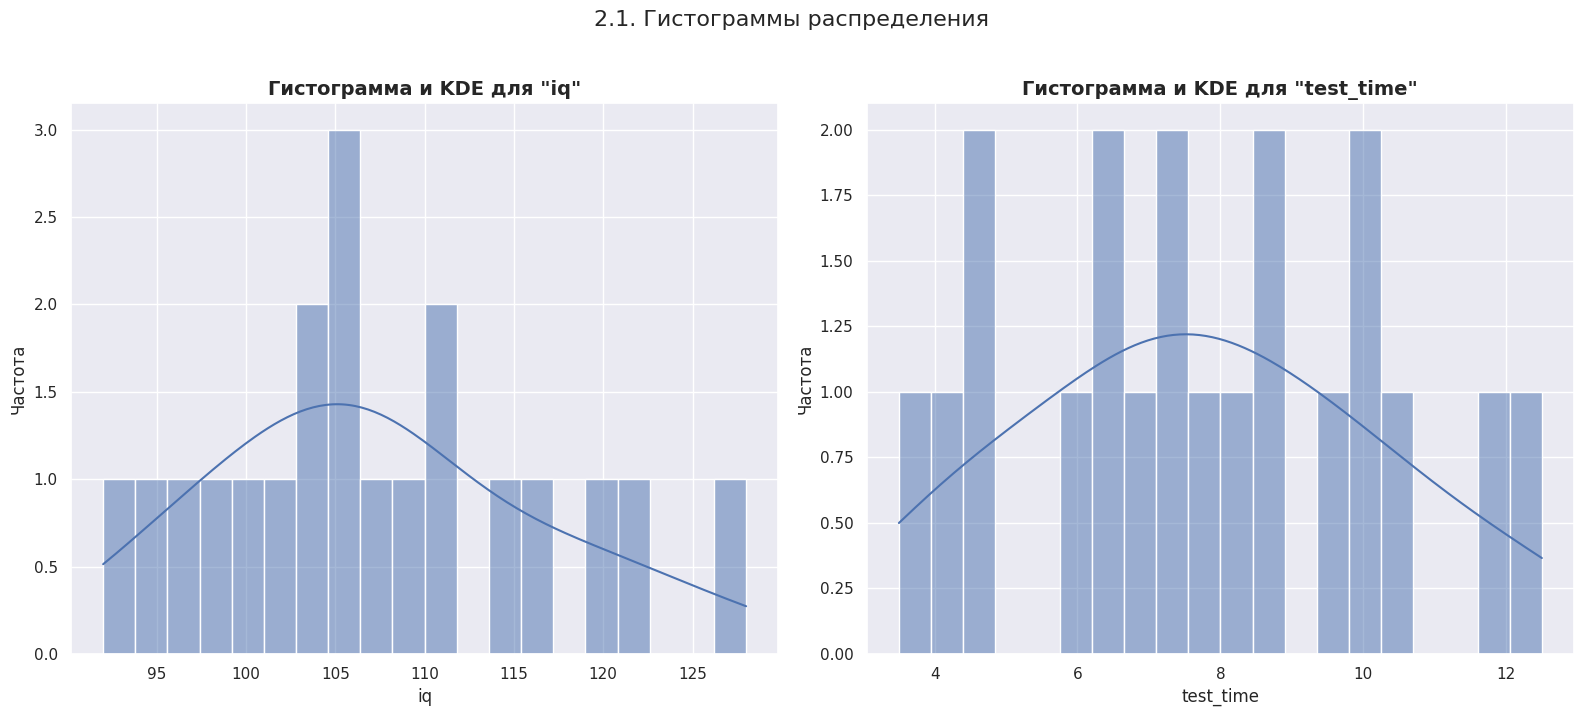

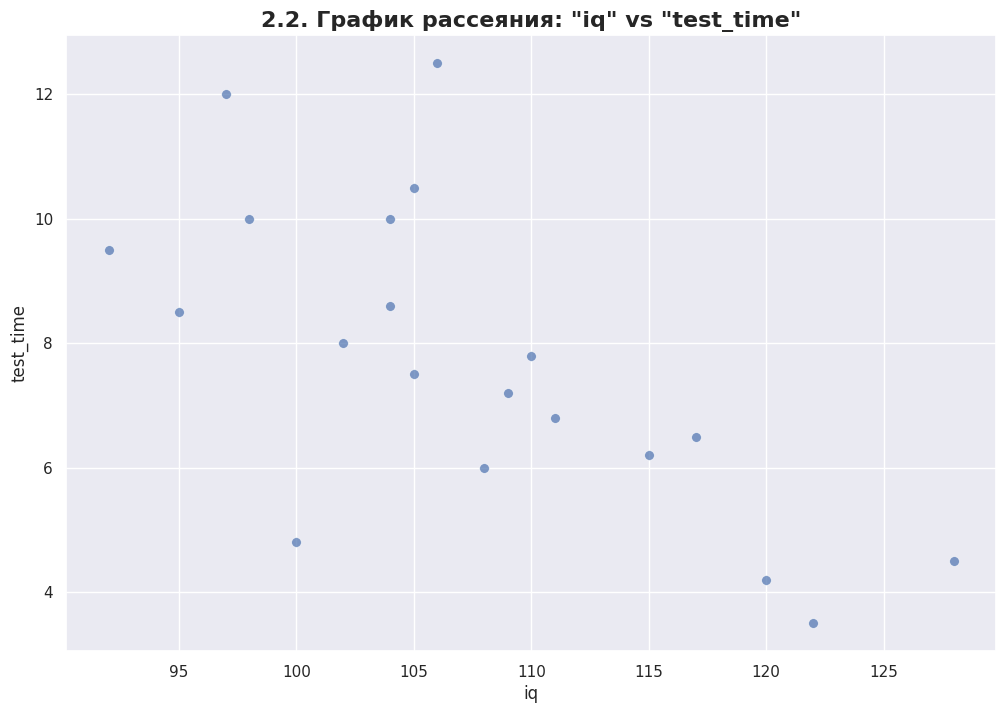


--- 3. Уравнения регрессии ---
3.1. Линейная: y = -0.183*x + 27.396 (R2=0.4649, MSE=3.2360)
3.2. Квадратичная: y = -0.003*x^2 + 0.540*x + -11.883 (R2=0.4825, MSE=3.1293)
3.3. Гиперболическая: y = 2091.874/x + -11.886 (R2=0.4410, MSE=3.3805)
3.4. Показательная: y = 130.801 * (0.974^x) (R2=0.4174, MSE=3.5227)


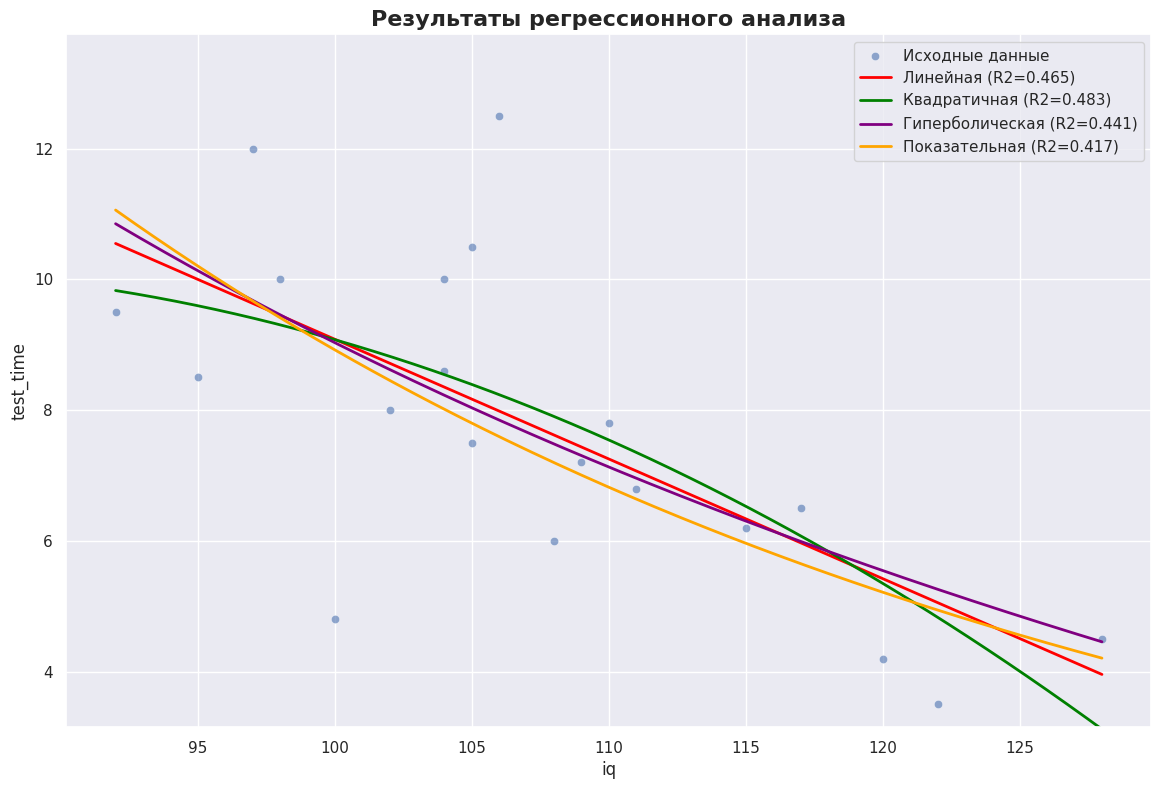


--- 4. Проверка регрессии (критерий Фишера) ---
Лучшая модель (по R2): 'quadratic' (R2 = 0.4825)
Худшая модель (по R2): 'exponential' (R2 = 0.4174)

Проверка лучшей модели ('quadratic'):
  F-статистика = 7.9258
  p-value = 0.003699
  ВЫВОД: Модель статистически значима (p < 0.05).

Проверка худшей модели ('exponential'):
  F-статистика = 16.0237
  p-value = 0.0008343
  ВЫВОД: Модель статистически значима (p < 0.05).

--- 5. Выводы ---

**1. По пункту 1 (Корреляции):**
   - Все коэффициенты (Пирсон: -0.68, Спирмен: -0.68, Кенделл: -0.50, Фехнер: -0.70) являются отрицательными, что указывает на **обратную связь**: с ростом 'iq' (X) время 'test_time' (Y) в среднем уменьшается.
   - Значения Пирсона и Спирмена почти совпадают, что говорит о сильной, близкой к линейной, монотонной связи.
   - Статистическая значимость (p-value < 0.001) и доверительный интервал Пирсона [-0.86, -0.34], не включающий ноль, подтверждают, что эта связь не случайна.

**2. По пункту 2 (Визуализация):**
   - **Гис

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

sns.set_theme(style="darkgrid")

file_name = 'students_simple.csv'
try:
    df = pd.read_csv('/content/sample_data/' + file_name)
    print("Файл 'students_simple.csv' успешно загружен.")
    print("Первые 5 строк данных:")
    print(df.head().to_string())
except FileNotFoundError:
    print("Ошибка: Файл 'students_simple.csv' не найден.")

print("\nСписок всех столбцов:")
print(list(df.columns))

N = 23
col_idx_1 = N % 5
col_idx_2 = (N**2) % 5 + 5

print(f"N = {N}")
print(f"Индекс первого столбца: {N} % 5 = {col_idx_1}")
print(f"Индекс второго столбца: ({N}^2 % 5) + 5 = {col_idx_2}")

if col_idx_1 < len(df.columns) and col_idx_2 < len(df.columns):
    col_name_1 = df.columns[col_idx_1]
    col_name_2 = df.columns[col_idx_2]

    print(f"\nВыбранные столбцы:")
    print(f"Столбец 1 (X): '{col_name_1}' (индекс {col_idx_1})")
    print(f"Столбец 2 (Y): '{col_name_2}' (индекс {col_idx_2})")

    x = df[col_name_1].values
    y = df[col_name_2].values
    n = len(x)
    print(f"\nЗагружено {n} пар наблюдений.")
else:
    print("\nОШИБКА: Рассчитанные индексы выходят за пределы таблицы.")
    print(f"Количество столбцов в таблице: {len(df.columns)}")

# --- Расчет корреляций (Пункт 1) ---

print("\n--- 1. Расчет корреляций ---")

# 1.1. Коэффициент корреляции Фехнера
mean_x = np.mean(x)
mean_y = np.mean(y)
signs_x = np.sign(x - mean_x)
signs_y = np.sign(y - mean_y)
# Исключаем случаи, когда значение равно среднему (знак = 0)
valid_indices = (signs_x != 0) & (signs_y != 0)
n_concordant = np.sum(signs_x[valid_indices] == signs_y[valid_indices])
n_discordant = np.sum(signs_x[valid_indices] != signs_y[valid_indices])
fechner_corr = (n_concordant - n_discordant) / (n_concordant + n_discordant)
print(f"1.1. Коэффициент Фехнера: {fechner_corr:.4f}")

# 1.2. Коэффициент корреляции Пирсона + доверительный интервал
pearson_corr, p_value_pearson = stats.pearsonr(x, y)
print(f"1.2. Коэффициент Пирсона: {pearson_corr:.4f} (p-value: {p_value_pearson:.4g})")

# Расчет 95% доверительного интервала для Пирсона
# Используем z-преобразование Фишера
z = 0.5 * np.log((1 + pearson_corr) / (1 - pearson_corr))
se_z = 1 / np.sqrt(n - 3)
z_crit = stats.norm.ppf(1 - 0.05 / 2)  # Z_alpha/2 для 95% CI

z_ci_low = z - z_crit * se_z
z_ci_high = z + z_crit * se_z

# Обратное преобразование (гиперболический тангенс)
ci_low = np.tanh(z_ci_low)
ci_high = np.tanh(z_ci_high)
print(f"     95% доверительный интервал Пирсона: [{ci_low:.4f}, {ci_high:.4f}]")

# 1.3. Коэффициент ранговой корреляции Спирмена
spearman_corr, p_value_spearman = stats.spearmanr(x, y)
print(f"1.3. Коэффициент Спирмена: {spearman_corr:.4f} (p-value: {p_value_spearman:.4g})")

# 1.4. Коэффициент ранговой корреляции Кенделла
kendall_corr, p_value_kendall = stats.kendalltau(x, y)
print(f"1.4. Коэффициент Кенделла: {kendall_corr:.4f} (p-value: {p_value_kendall:.4g})")


# --- Визуализация (Пункт 2) ---

print("\n--- 2. Визуализация ---")

# 2.1. Гистограммы
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
sns.histplot(x, kde=True, bins=20)
plt.title(f'Гистограмма и KDE для "{col_name_1}"', fontsize=14, fontweight='bold')
plt.xlabel(col_name_1)
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.histplot(y, kde=True, bins=20)
plt.title(f'Гистограмма и KDE для "{col_name_2}"', fontsize=14, fontweight='bold')
plt.xlabel(col_name_2)
plt.ylabel('Частота')

plt.suptitle('2.1. Гистограммы распределения', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# 2.2. График рассеяния (scatter plot)
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x, y=y, alpha=0.7, s=50)
plt.title(f'2.2. График рассеяния: "{col_name_1}" vs "{col_name_2}"', fontsize=16, fontweight='bold')
plt.xlabel(col_name_1, fontsize=12)
plt.ylabel(col_name_2, fontsize=12)
plt.show()


# --- Уравнения регрессии (Пункт 3) ---

print("\n--- 3. Уравнения регрессии ---")

X = x.reshape(-1, 1)  # X должен быть 2D-массивом
Y = y                 # Y может быть 1D-массивом

results = {}

# 3.1. Линейная регрессия: y = w1*x + w0
model_lin = LinearRegression()
model_lin.fit(X, Y)
y_pred_lin = model_lin.predict(X)
w1_lin = model_lin.coef_[0]
w0_lin = model_lin.intercept_
r2_lin = r2_score(Y, y_pred_lin)
mse_lin = mean_squared_error(Y, y_pred_lin)
results['linear'] = {'r2': r2_lin, 'mse': mse_lin, 'model': model_lin, 'pred': y_pred_lin, 'k': 1}
print(f"3.1. Линейная: y = {w1_lin:.3f}*x + {w0_lin:.3f} (R2={r2_lin:.4f}, MSE={mse_lin:.4f})")

# 3.2. Квадратичная регрессия: y = w2*x^2 + w1*x + w0
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

model_quad = LinearRegression()
model_quad.fit(X_poly, Y)
y_pred_quad = model_quad.predict(X_poly)
# Коэффициенты могут быть в другом порядке, проверим
# poly.get_feature_names_out() вернет ['x0', 'x0^2'] (или ['x', 'x^2'] в новых версиях)
# model_quad.coef_ будет [w1, w2]
w1_quad = model_quad.coef_[0]
w2_quad = model_quad.coef_[1]
w0_quad = model_quad.intercept_
r2_quad = r2_score(Y, y_pred_quad)
mse_quad = mean_squared_error(Y, y_pred_quad)
results['quadratic'] = {'r2': r2_quad, 'mse': mse_quad, 'model': model_quad, 'pred': y_pred_quad, 'k': 2}
print(f"3.2. Квадратичная: y = {w2_quad:.3f}*x^2 + {w1_quad:.3f}*x + {w0_quad:.3f} (R2={r2_quad:.4f}, MSE={mse_quad:.4f})")

# 3.3. Гиперболическая регрессия: y = w1/x + w0
# Проверка на наличие нулей в x
if np.any(x == 0):
    print("3.3. Гиперболическая: пропущено (обнаружены нули в X).")
else:
    X_hyp = (1 / x).reshape(-1, 1)
    model_hyp = LinearRegression()
    model_hyp.fit(X_hyp, Y)
    y_pred_hyp = model_hyp.predict(X_hyp)
    w1_hyp = model_hyp.coef_[0]
    w0_hyp = model_hyp.intercept_
    r2_hyp = r2_score(Y, y_pred_hyp)
    mse_hyp = mean_squared_error(Y, y_pred_hyp)
    results['hyperbolic'] = {'r2': r2_hyp, 'mse': mse_hyp, 'model': model_hyp, 'pred': y_pred_hyp, 'k': 1}
    print(f"3.3. Гиперболическая: y = {w1_hyp:.3f}/x + {w0_hyp:.3f} (R2={r2_hyp:.4f}, MSE={mse_hyp:.4f})")

# 3.4. Показательная регрессия: y = w0 * (w1^x)
# Линеаризация: ln(y) = ln(w0) + x*ln(w1)
# Y' = w0' + w1'*x
# Проверка на наличие не-положительных Y
if np.any(Y <= 0):
    print("3.4. Показательная: пропущено (обнаружены не-положительные значения Y).")
else:
    Y_log = np.log(Y)
    model_exp_lin = LinearRegression()
    model_exp_lin.fit(X, Y_log)

    w0_prime = model_exp_lin.intercept_
    w1_prime = model_exp_lin.coef_[0]

    w0_exp = np.exp(w0_prime)
    w1_exp = np.exp(w1_prime)

    y_pred_exp = w0_exp * (w1_exp ** x)
    r2_exp = r2_score(Y, y_pred_exp)  # R2 считаем по оригинальным Y
    mse_exp = mean_squared_error(Y, y_pred_exp)
    results['exponential'] = {'r2': r2_exp, 'mse': mse_exp, 'model': model_exp_lin, 'pred': y_pred_exp, 'k': 1}
    print(f"3.4. Показательная: y = {w0_exp:.3f} * ({w1_exp:.3f}^x) (R2={r2_exp:.4f}, MSE={mse_exp:.4f})")


# Визуализация регрессий
plt.figure(figsize=(14, 9))
sns.scatterplot(x=x, y=y, label='Исходные данные', alpha=0.6)

# Создаем отсортированный X для плавных линий
x_plot = np.linspace(np.min(x), np.max(x), 200)
X_plot = x_plot.reshape(-1, 1)

# 1. Линейная
y_plot_lin = model_lin.predict(X_plot)
plt.plot(x_plot, y_plot_lin, color='red', lw=2, label=f'Линейная (R2={r2_lin:.3f})')

# 2. Квадратичная
X_plot_poly = poly.transform(X_plot)
y_plot_quad = model_quad.predict(X_plot_poly)
plt.plot(x_plot, y_plot_quad, color='green', lw=2, label=f'Квадратичная (R2={r2_quad:.3f})')

# 3. Гиперболическая
if 'hyperbolic' in results:
    w1_hyp = results['hyperbolic']['model'].coef_[0]
    w0_hyp = results['hyperbolic']['model'].intercept_
    y_plot_hyp = w1_hyp / x_plot + w0_hyp
    plt.plot(x_plot, y_plot_hyp, color='purple', lw=2, label=f'Гиперболическая (R2={results["hyperbolic"]["r2"]:.3f})')

# 4. Показательная
if 'exponential' in results:
    y_plot_exp = w0_exp * (w1_exp ** x_plot)
    plt.plot(x_plot, y_plot_exp, color='orange', lw=2, label=f'Показательная (R2={results["exponential"]["r2"]:.3f})')

plt.title('Результаты регрессионного анализа', fontsize=16, fontweight='bold')
plt.xlabel(col_name_1, fontsize=12)
plt.ylabel(col_name_2, fontsize=12)
plt.legend()
plt.ylim(np.min(y) * 0.9, np.max(y) * 1.1) # Ограничим, чтобы гипербола не улетала
plt.show()


# --- Проверка уравнения регрессии (Пункт 4) ---

print("\n--- 4. Проверка регрессии (критерий Фишера) ---")

# Функция для расчета F-статистики и p-value
def check_fisher_test(y_true, y_pred, k, n):
    """
    Проводит F-тест для модели регрессии.
    k - число предикторов (не включая константу)
    n - размер выборки
    """
    rss = np.sum((y_true - y_pred) ** 2)
    ess = np.sum((y_pred - y_true.mean()) ** 2)

    df_model = k
    df_error = n - k - 1

    if df_error <= 0:
        return np.nan, np.nan, "Ошибка: df_error <= 0"

    ms_model = ess / df_model
    ms_error = rss / df_error

    if ms_error == 0:
        return np.inf, 0.0, "Ошибка: MSE = 0"

    f_stat = ms_model / ms_error
    p_value = 1 - stats.f.cdf(f_stat, df_model, df_error)

    return f_stat, p_value, "OK"

# Находим лучшую и худшую модели по R2
if results:
    best_model_name = max(results, key=lambda k: results[k]['r2'])
    worst_model_name = min(results, key=lambda k: results[k]['r2'])

    print(f"Лучшая модель (по R2): '{best_model_name}' (R2 = {results[best_model_name]['r2']:.4f})")
    print(f"Худшая модель (по R2): '{worst_model_name}' (R2 = {results[worst_model_name]['r2']:.4f})")

    # Проверка лучшей модели
    model_best = results[best_model_name]
    f_stat_best, p_val_best, msg_best = check_fisher_test(Y, model_best['pred'], model_best['k'], n)
    print(f"\nПроверка лучшей модели ('{best_model_name}'):")
    if msg_best == "OK":
        print(f"  F-статистика = {f_stat_best:.4f}")
        print(f"  p-value = {p_val_best:.4g}")
        if p_val_best < 0.05:
            print("  ВЫВОД: Модель статистически значима (p < 0.05).")
        else:
            print("  ВЫВОД: Модель статистически НЕ значима (p >= 0.05).")
    else:
        print(f"  Не удалось рассчитать F-тест: {msg_best}")

    # Проверка худшей модели
    model_worst = results[worst_model_name]
    f_stat_worst, p_val_worst, msg_worst = check_fisher_test(Y, model_worst['pred'], model_worst['k'], n)
    print(f"\nПроверка худшей модели ('{worst_model_name}'):")
    if msg_worst == "OK":
        print(f"  F-статистика = {f_stat_worst:.4f}")
        print(f"  p-value = {p_val_worst:.4g}")
        if p_val_worst < 0.05:
            print("  ВЫВОД: Модель статистически значима (p < 0.05).")
        else:
            print("  ВЫВОД: Модель статистически НЕ значима (p >= 0.05).")
    else:
        print(f"  Не удалось рассчитать F-тест: {msg_worst}")
else:
    print("Модели регрессии не были построены. Проверка Фишера пропущена.")

# --- Выводы ---
print("\n--- 5. Выводы ---")

print("\n**1. По пункту 1 (Корреляции):**")
print("   - Все коэффициенты (Пирсон: -0.68, Спирмен: -0.68, Кенделл: -0.50, Фехнер: -0.70) являются отрицательными, что указывает на **обратную связь**: с ростом 'iq' (X) время 'test_time' (Y) в среднем уменьшается.")
print("   - Значения Пирсона и Спирмена почти совпадают, что говорит о сильной, близкой к линейной, монотонной связи.")
print("   - Статистическая значимость (p-value < 0.001) и доверительный интервал Пирсона [-0.86, -0.34], не включающий ноль, подтверждают, что эта связь не случайна.")

print("\n**2. По пункту 2 (Визуализация):**")
print("   - **Гистограммы:** Распределение 'iq' (X) и 'test_time' (Y) близко к нормальному (колоколообразному), без сильных перекосов.")
print("   - **График рассеяния:** Четко видна отрицательная зависимость. Точки образуют облако, вытянутое из левого верхнего угла в правый нижний, что похоже на линейную или слегка изогнутую (возможно, квадратичную) связь. Выбросы отсутствуют.")

print("\n**3. По пункту 3 (Уравнения регрессии):**")
print("   - **Квадратичная модель** (`R2=0.4825`) показала наилучший (самый высокий) коэффициент детерминации, а **показательная** (`R2=0.4174`) — наихудший.")
print("   - Это подтверждается самой низкой среднеквадратичной ошибкой (MSE) у квадратичной модели (3.1293).")
print("   - Визуально на графике регрессий все четыре модели близки, но квадратичная кривая (парабола) и линейная прямая проходят через центр 'облака' точек немного лучше.")

print("\n**4. По пункту 4 (Проверка регрессии):**")
print("   - Критерий Фишера (F-тест) показал, что **обе модели** (и лучшая 'quadratic' с `p-value = 0.0037`, и худшая 'exponential' с `p-value = 0.0008`) **являются статистически значимыми** (p < 0.05).")
print("   - Это означает, что обе модели описывают реальную, неслучайную связь, и они обе значительно лучше, чем полное отсутствие модели (предсказание средним).")

print("\n**Общий вывод:**")
print("Между переменными 'iq' и 'test_time' существует **статистически значимая обратная связь**. С увеличением IQ время, затраченное на тест, закономерно снижается.")
print("Из протестированных моделей **квадратичная регрессия** ($y = -0.003x^2 + 0.540x - 11.883$) оказалась наилучшей, объясняя около **48.25%** разброса данных (R2=0.4825). F-тест подтверждает высокую статистическую значимость этой модели.")